In [1]:
# Import the libraries
import numpy as np
import pandas as pd
from scipy.stats import norm

In [2]:
# Define a function to compute the BS formula
def call_BS(S0, K, T, r, sigma):
    d1 = (np.log(S0 / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    C = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    
    return C

In [3]:
# Fix the pricing parameters
S0 = 100
T = 1
K = 101
r = 0.05
sigma = 0.3

In [4]:
# Compute the BS price of the call
C0_BS = call_BS(S0, K, T, r, sigma)
C0_BS

13.75561909713742

In [5]:
# Import the NumPy's pseudo-random generator
from numpy.random import default_rng

In [6]:
# Create the generator
rng = default_rng(100)

In [7]:
# Generate the standard normal numbers
M = 1000000
epsilons = rng.standard_normal(M)

In [8]:
# Generate ST
ST = S0 * np.exp((r - sigma**2 / 2) * T + sigma * np.sqrt(T) * epsilons)
ST

array([ 71.01600626, 109.62845061, 127.03039731, ...,  90.06207808,
        89.31650055,  88.48946422])

In [9]:
# Generate the payoff of the call
CT = np.maximum(ST - K, 0)
CT

array([ 0.        ,  8.62845061, 26.03039731, ...,  0.        ,
        0.        ,  0.        ])

In [10]:
# Compute the Monte Carlo price
C0_MC = np.exp(-r * T) * CT.mean()
C0_MC

13.738360638652495

In [11]:
# Define the payoff function
def phi(x):
    return np.maximum(x - K, 0)

In [12]:
# Define the lognormal density
mu_t = np.log(S0) + (r - sigma**2 / 2) * T
sigma_t = sigma * np.sqrt(T)

from scipy.stats import lognorm

def l(x):
    return lognorm.pdf(x, s=sigma_t, scale=np.exp(mu_t))

In [13]:
# Define the integrand function
def f_int(x):
    return phi(x) * l(x)

In [14]:
# Compute the integral
from scipy.integrate import quad

I = quad(f_int, -np.infty, np.infty)[0]
I

14.46088476822077

In [15]:
# Compute the integral price
C0_int = np.exp(-r * T) * I
C0_int

13.755619095845784

Text(0.5, 1.0, 'Lognormal density')

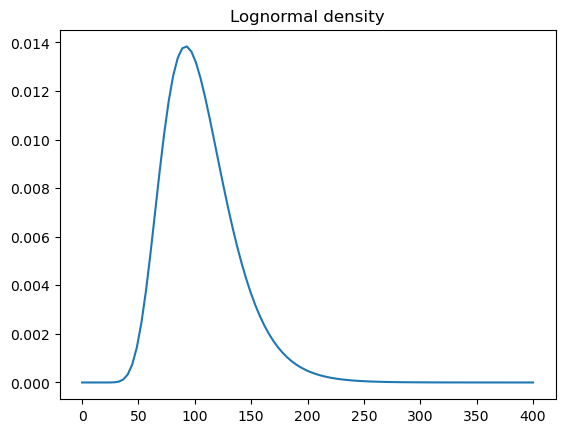

In [16]:
# Plot the lognormal density
import matplotlib.pyplot as plt

x = np.linspace(0.01, 400, 100)
y = l(x)

plt.plot(x, y)
plt.title('Lognormal density')

In [17]:
# Load call prices from csv
calls = pd.read_csv('Calls.csv')
calls

,Ticker,S0,Type,Val_Date,Expiration,K,sigma,Opt_Price,T
0,EFX,141.29,call,2019-08-15,2019-08-23,137.0,0.2837,5.000,0.031746
1,TROW,105.46,call,2019-08-15,2019-09-13,95.0,0.3092,11.450,0.115079
2,GWW,264.81,call,2019-08-15,2019-08-30,265.0,0.3261,6.850,0.059524
3,SPOT,145.37,call,2019-08-15,2019-08-30,170.0,0.3855,0.100,0.059524
4,GS,196.18,call,2019-08-15,2020-01-17,190.0,0.2515,16.925,0.615079
...,...,...,...,...,...,...,...,...,...
99995,AMD,29.67,call,2019-08-15,2019-08-16,45.0,1.6415,0.005,0.003968
99996,VXX,29.70,call,2019-08-15,2020-03-20,28.0,0.7422,7.550,0.865079
99997,BYND,144.20,call,2019-08-15,2019-08-16,100.0,1.8239,44.350,0.003968
99998,CFR,82.12,call,2019-08-15,2019-10-18,125.0,0.3883,0.075,0.253968


In [18]:
# Fix the risk-free rate on the market
r = 0.0195

In [20]:
# Compute the BS price on every row
calls['C0_BS'] = calls.apply(lambda row:
                            call_BS(row['S0'],
                                    row['K'],
                                    row['T'],
                                    r,
                                    row['sigma']
                                   ), axis=1)

In [21]:
calls

,Ticker,S0,Type,Val_Date,Expiration,K,sigma,Opt_Price,T,C0_BS
0,EFX,141.29,call,2019-08-15,2019-08-23,137.0,0.2837,5.000,0.031746,5.518145
1,TROW,105.46,call,2019-08-15,2019-09-13,95.0,0.3092,11.450,0.115079,11.517641
2,GWW,264.81,call,2019-08-15,2019-08-30,265.0,0.3261,6.850,0.059524,8.459813
3,SPOT,145.37,call,2019-08-15,2019-08-30,170.0,0.3855,0.100,0.059524,0.303387
4,GS,196.18,call,2019-08-15,2020-01-17,190.0,0.2515,16.925,0.615079,19.675526
...,...,...,...,...,...,...,...,...,...,...
99995,AMD,29.67,call,2019-08-15,2019-08-16,45.0,1.6415,0.005,0.003968,0.000024
99996,VXX,29.70,call,2019-08-15,2020-03-20,28.0,0.7422,7.550,0.865079,8.855875
99997,BYND,144.20,call,2019-08-15,2019-08-16,100.0,1.8239,44.350,0.003968,44.210421
99998,CFR,82.12,call,2019-08-15,2019-10-18,125.0,0.3883,0.075,0.253968,0.120007


In [22]:
# Compute the MAE
MAE = (np.abs(calls['Opt_Price'] - calls['C0_BS'])).mean()
MAE

1.808959871452749

In [23]:
# Compute the RMSE
RMSE = np.sqrt(((calls['Opt_Price'] - calls['C0_BS'])**2).mean())
RMSE

9.855462845916065